In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import pandas as pd

In [14]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session, create_session
from sqlalchemy import create_engine, func, MetaData, Table, Column, ForeignKey, inspect, desc
import pandas as pd
import datetime as dt
import datetime
from datetime import datetime
import time
import numpy as np
# Import and establish Base for which classes will be constructed 
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

# Import modules to declare columns and column data types
from sqlalchemy import Column, Integer, String, Float, Date

import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [17]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [18]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [28]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

2016-08-22 00:00:00


<Figure size 1296x720 with 0 Axes>

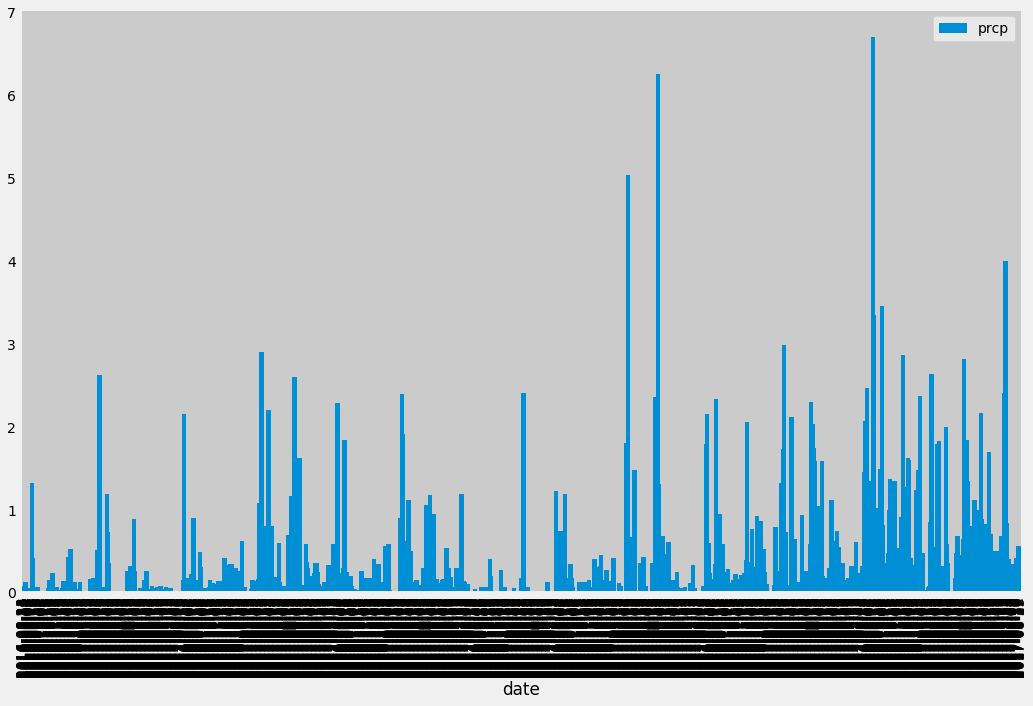

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
max_dt = session.query(Measurement.date).\
        group_by(Measurement.date).\
        order_by(desc(Measurement.date)).\
        first()
max_dt_v = datetime.strptime((str(np.ravel(max_dt)[0])), '%Y-%m-%d')
one_year_b3 = max_dt_v - dt.timedelta(days=366)
print(one_year_b3)

query1 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()
stat1_pd = pd.DataFrame(data=query1, columns=["date", "prcp"])
stat1_pd = stat1_pd.set_index('date', drop=True)
stat1_pd.head()

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=[18, 10])
stat1_pd.plot(kind="bar", figsize=(16,10), width =10)

![precipitation](Images/precipitation.png)

In [30]:
# Use Pandas to calcualte the summary statistics for the precipitation data
stat1_pd.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [31]:
# Design a query to show how many stations are available in this dataset?
query2 = session.query(Station.station).group_by(Station.station).count()
print(query2)

9


In [32]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
query3 = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc())
query3.all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
query4 = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs) , func.avg(Measurement.tobs)).\
                filter(Measurement.station == "USC00519281").all()
            
print(query4)

[(54.0, 85.0, 71.66378066378067)]


In [34]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query5 = session.query(Measurement.station, Measurement.date, Measurement.tobs).group_by(Measurement.date).\
                filter(Measurement.date >= '2016-08-23').\
                filter(Measurement.station=="USC00519281").all()

# Use Pandas Plotting with Matplotlib to plot the histogram
stat2_pd = pd.DataFrame(data=query5, columns=["station", "date", "tobs"])
stat2_pd = stat2_pd.set_index('date', drop=True)
stat2_pd = stat2_pd.drop(columns="station", axis=1)
stat2_pd.head()


,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


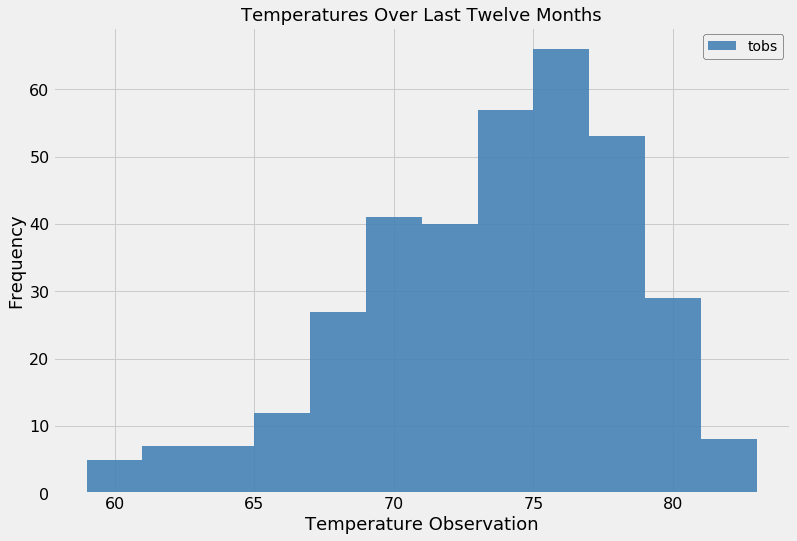

In [35]:
#create histogram/plot the histogram.....
#n, bins, patches = 
x = stat2_pd['tobs']
num_bins = 12

plt.figure(figsize=[12.8, 8])
temp_plot = plt.hist(x, num_bins, facecolor='steelblue', label='tobs', alpha=0.9)

plt.xlabel('Temperature Observation', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Temperatures Over Last Twelve Months', fontsize=18)
plt.tick_params(axis='y', labelsize=16)
plt.tick_params(axis='x', labelsize=16)
legend = plt.legend(frameon=True, edgecolor='black', fontsize='medium')

#plot the data
plt.subplots_adjust(left=0.15)
plt.show()

![precipitation](Images/station-histogram.png)

In [36]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [37]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    select = [Measurement.date, func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*select).group_by(Measurement.date).filter(func.strftime("%Y-%m-%d", Measurement.date) >=start_date).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) <=end_date).all()
print(calc_temps("2016-06-10", "2016-06-20"))


[('2016-06-10', 70.0, 74.66666666666667, 78.0), ('2016-06-11', 72.0, 75.5, 78.0), ('2016-06-12', 74.0, 76.0, 78.0), ('2016-06-13', 73.0, 77.14285714285714, 80.0), ('2016-06-14', 72.0, 77.28571428571429, 81.0), ('2016-06-15', 70.0, 76.57142857142857, 80.0), ('2016-06-16', 70.0, 75.5, 79.0), ('2016-06-17', 69.0, 73.28571428571429, 76.0), ('2016-06-18', 73.0, 75.83333333333333, 78.0), ('2016-06-19', 74.0, 76.5, 79.0), ('2016-06-20', 72.0, 75.57142857142857, 80.0)]


In [40]:
#Calculate temps for my trip by running calc_temps form last year calc.
data = calc_temps("2016-06-10", "2016-06-20")

#Put the results into a dataframe
stat3_pd = pd.DataFrame(data=data, columns=["date", "tmin", "tavg", "tmax"])
stat3_pd = stat3_pd.set_index('date', drop=True)
stat3_pd.head()



,tmin,tavg,tmax
date,,,
2016-06-10,70.0,74.666667,78.0
2016-06-11,72.0,75.500000,78.0
2016-06-12,74.0,76.000000,78.0
2016-06-13,73.0,77.142857,80.0
2016-06-14,72.0,77.285714,81.0


In [44]:
#variables define for chart
p3_date = stat3_pd.index.values
p3_tmin = stat3_pd['tmin']
p3_tavg = stat3_pd['tavg']
p3_tmax = stat3_pd['tmax']


<Figure size 432x288 with 0 Axes>

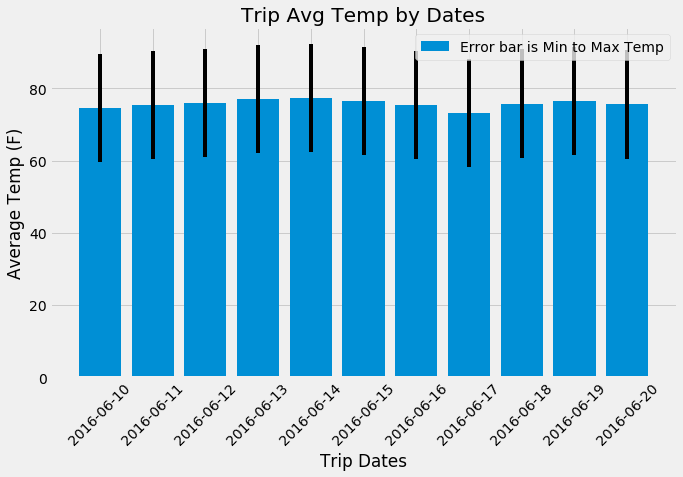

In [45]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.clf()
plt.figure(figsize=[10, 6])
pavg = plt.bar(p3_date, p3_tavg, yerr=15, label='Error bar is Min to Max Temp')
plt.ylabel('Average Temp (F)')
plt.xlabel('Trip Dates')
plt.title('Trip Avg Temp by Dates')
plt.xticks(rotation=45)
plt.legend()


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


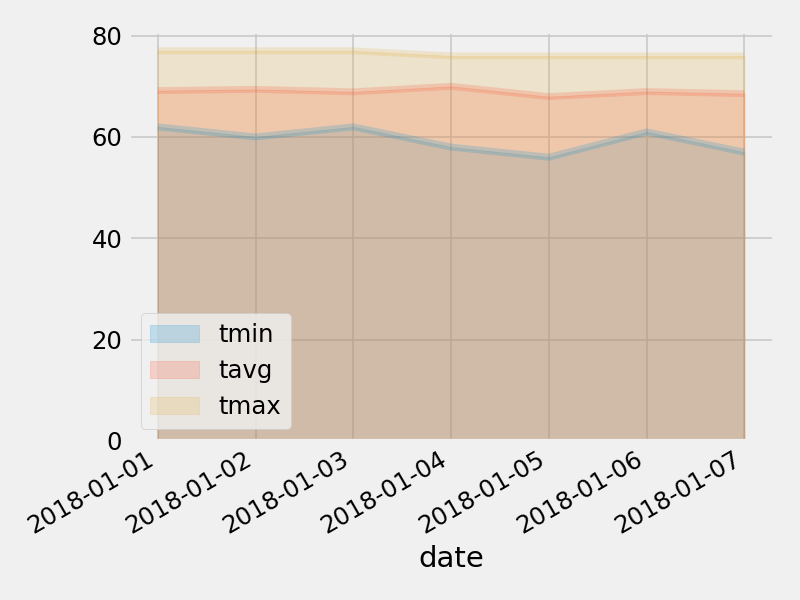

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
